# Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Here are some of the sub-packages contained in Scipy:

* File input/output: scipy.io
* Special functions: scipy.special
* Linear algebra operations: scipy.linalg
* Fast Fourier transforms: scipy.fftpack
* Optimization and fit: scipy.optimize
* Statistics and random numbers: scipy.stats
* Interpolation: scipy.interpolate
* Numerical integration: scipy.integrate
* Signal processing: scipy.signal
* Image processing: scipy.ndimage

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# The Statistics sub-package

The `scipy.stats` sub-package contains a large number of probability distributions as well as a growing library of statistical functions. This is a great tool to have for any Data Analyst/Scientist using Python because Statistics is at the core of Data Science. 

In this section we learn how to perform common statistical computations with Python and use them to make sense of a dataset that contains information about alcohol consumption of teenagers.

# Project: Alcohol consumption of students

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In this project we use a dataset containing information about Portuguese students from two public schools. This is a real world dataset that was collected in order to study alcohol consumption in young people and its effects on students' academic performance. The dataset was built from two sources: school reports and questionnaires.

**Attributes:**

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
* 3 age - student's age (numeric: from 15 to 22) 
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- 13 traveltime - home to school travel time (numeric: 1 <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
- 16 schoolsup - extra educational support (binary: yes or no) 
- 17 famsup - family educational support (binary: yes or no) 
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- 19 activities - extra-curricular activities (binary: yes or no) 
- 20 nursery - attended nursery school (binary: yes or no) 
- 21 higher - wants to take higher education (binary: yes or no) 
- 22 internet - Internet access at home (binary: yes or no) 
- 23 romantic - with a romantic relationship (binary: yes or no) 
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
- 30 absences - number of school absences (numeric: from 0 to 93) 

**these grades are related with the course subject:**

- 31 G1 - first period grade (numeric: from 0 to 20) 
- 31 G2 - second period grade (numeric: from 0 to 20) 
- 32 G3 - final grade (numeric: from 0 to 20, output target) 

In [4]:
student = pd.read_csv("../data/student/student.csv", sep=";")

In [5]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In this demostration we are interested in 3 variables:

1. Alcohol consumption level (we will create it and call it `acl`)
2. Final grade for the course subject (`G3`)
3. Gender of the student

In [6]:
student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7

# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

## Confidence Intervals

### Confidence interval for the mean of the final grade

We can calculate confidence intervals for means and for proportions.

In [7]:
sample_size = student.shape[0]
print(sample_size)

649


Because we have a sample size that is much greater than 30, we can use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) to calculate confidence intervals. According to this theorem we can calculate a confidence interval for the mean using the normal distribution.

To get the confidence interval for the mean we need three numbers:

1. Sample mean
2. Standard error
3. Confidence level

Formula for the standar error:

$$ SE = \frac{s}{\sqrt n} $$

In [8]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

11.906009244992296

In [9]:
std_error_grades = student['G3'].std()/sqrt(sample_size)
std_error_grades

0.12681435030794902

In [10]:
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades)

(11.65745768566587, 12.154560804318722)

Now let's calculate a confidence interval for the proportion of students with High Alcohol Consumption Level. Again we need 3 numbers:

1. Sample proportion
2. Standard error
3. Confidence level

For proportions the standars error is given by:

$$ SE = \sqrt \frac{\hat p (1 - \hat p)}{n} $$

In [11]:
student['acl'].value_counts(normalize=True)

Low     0.744222
High    0.255778
Name: acl, dtype: float64

In [12]:
high_prop = student['acl'].value_counts(normalize=True)['High'] # p^
std_error_prop = sqrt(high_prop*(1-high_prop)/sample_size)
std_error_prop

0.017126182364211599

In [13]:
stats.norm.interval(0.98, loc=high_prop, scale=std_error_prop)

(0.21593666225148048, 0.29561957811831929)

0.25 (or 25.0%) seems like a good guess for the proportion of students with High Alcohol Consumption Levels in the population.

## Probability calculations

There are dozens of probability distributions available in the stats package for doing simulations of random variables or probability calculations. You can take a look at the reference [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

**Assumming the P(High ALC) = 0.25. In a class of 10, What is the probability of finding 5 students with High ACL?**

In [14]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In [15]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    ax[0].bar(left=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

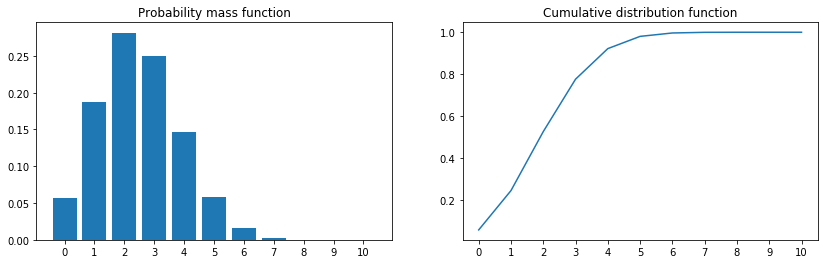

In [16]:
plot_probs_n(10)

### Null Hypothesis Testing framework

**1. Setting up two competing hypotheses** - Each hypothesis test includes two hypothesis about the population.  One is the *null hypothesis*, notated as *Ho*, which is a statement of a particular parameter value.  This hypothesis is assumed to be true until there is evidence to suggest otherwise.  The second hypothesis is called the *alternative, or research, hypothesis*, notated as *Ha*.  The alternative hypothesis is a statement of a range of alternative values in which the parameter may fall.  One must also check that any assumptions (conditions) needed to run the test have been satisfied e.g. normality of data, independence, and number of success and failure outcomes.

**2. Set in advanced some level of significance, called alpha.**  This value is used as a probability cutoff for making decisions about the null hypothesis.  As we will learn later, this alpha value represents the probability we are willing to place on our test for making an incorrect decision in regards to rejecting the null hypothesis.  The most common alpha value is 0.05  or 5%. Other popular choices are 0.01 (1%) and  0.1 (10%).

**3. Calculate a test statistic and the p-value (or find rejection region)** Gather sample data and calculate a test statistic where the sample statistic is compared to the parameter value.  The test statistic is calculated under the assumption the null hypothesis is true, and incorporates a measure of standard error and assumptions (conditions) related to the sampling distribution.  Such assumptions could be normality of data, independence, and number of success and failure outcomes. A p-value is found by using the test statistic to calculate the probability of the sample data producing such a test statistic or one more extreme.  The rejection region is found by using alpha to find a critical value; the rejection region is the area that is more extreme than the critical value.

**4. Make a test decision about the null hypothesis -**  In this step we decide to either reject the null hypothesis or decide to fail to reject the null hypothesis.  Notice we do not make a decision where we will accept the null hypothesis. 

**5. State an overall conclusion - **Once we have found the p-value or rejection region, and made a statistical decision about the null hypothesis (i.e. we will reject the null or fail to reject the null).  Following this decision, we want to summarize our results into an overall conclusion for our test.

<h2>Some Statistical test from <code>scipy.stats</code></h2>

* kurtosistest(a[, axis, nan_policy])	Tests whether a dataset has normal kurtosis
* normaltest(a[, axis, nan_policy])	Tests whether a sample differs from a normal distribution.
* skewtest(a[, axis, nan_policy])	Tests whether the skew is different from the normal distribution.
* pearsonr(x, y)	Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_ind(a, b[, axis, equal_var, nan_policy])	Calculates the T-test for the means of two independent samples of scores.
* ttest_ind_from_stats(mean1, std1, nobs1, ...)	T-test for means of two independent samples from descriptive statistics.
* ttest_rel(a, b[, axis, nan_policy])	Calculates the T-test on TWO RELATED samples of scores, a and b.
* kstest(rvs, cdf[, args, N, alternative, mode])	Perform the Kolmogorov-Smirnov test for goodness of fit.
* chisquare(f_obs[, f_exp, ddof, axis])	Calculates a one-way chi square test.
* ansari(x, y)	Perform the Ansari-Bradley test for equal scale parameters
* bartlett(*args)	Perform Bartlett’s test for equal variances
* levene(*args, **kwds)	Perform Levene test for equal variances.
* shapiro(x[, a, reta])	Perform the Shapiro-Wilk test for normality.
* anderson(x[, dist])	Anderson-Darling test for data coming from a particular distribution
* anderson_ksamp(samples[, midrank])	The Anderson-Darling test for k-samples.

## Are the population variances equal in the two groups of students (Low vs. High alcohol consumption)?

Let's perform the [Bartetts's test](https://en.wikipedia.org/wiki/Bartlett%27s_test) whose Null Hypothesis is that the variances are equal. We will use a significance level of 5.0%

In [17]:
student.groupby('acl')['G3'].var()

acl
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [18]:
grades_low_acl = student['G3'][student['acl']=='Low']
grades_high_acl = student['G3'][student['acl']=='High']
stats.bartlett(grades_low_acl, grades_high_acl)

BartlettResult(statistic=1.1025085913382719, pvalue=0.29371623181165202)

According to the test we **cannot** reject the Null hypothesis of equal variances, so we will use assume that the two groups are samples from a population with the same variances. This information will be useful in our next test.

## Does alcohol consumption affect academic performance?

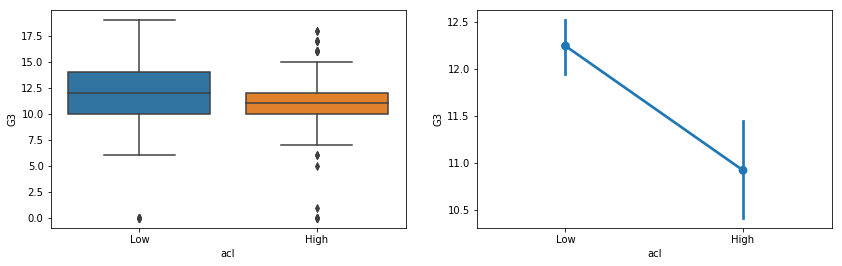

In [19]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='acl', y='G3', data=student, ax=axes[0])
sns.pointplot(x='acl', y='G3', data=student, ax=axes[1]);

The visualizations sugest there is a difference between the means of the final grade of the two groups. Now we will perform a formal statistical test to confirm the hypothesis that students with High alcohol consumption level perform worse than the students with Low alcohol consumption level.

> **Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.**

>  **Alternative Hypothesis: The population means of the final grades are different.**

A common test to apply in for these cases is the [two-sample t-test](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm), which is used to determine if two population means are equal. 

All statistical tests have assumptions that must be checked for their conclusions to be valid, for these test the assumptions are:

1. **Independent samples**: we will assume that the method for collecting the data assured that the answers given by the students are independent.
2. **Large enough sample size or observations come from a normally-distributed population**: this assumption is required if we are working with small samples (less than 30), since in the smaller group we have 166 observations we can say that we have a "large enough" sample.
3. **Variances are equal**

In addition this test have two versions: one assuming equal variances and the other assumming unequal variances.

According to the test we can not reject the Null hypothesis of equal variances, so we will use assume that the two samples come from a population with the same population variances. Time to perform our t-test.

In [20]:
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.6036088303692686e-06)

Since we got such a low p-value we can reject the Null hypothesis of equal means for the two groups at a level of significance of 5%.

> **Conclusion: there is a statistical significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the other group, the results suggest that alcohol consumption has a negative impact on students' academic performance.**

## Do male teenagers drink more than female teenagers?

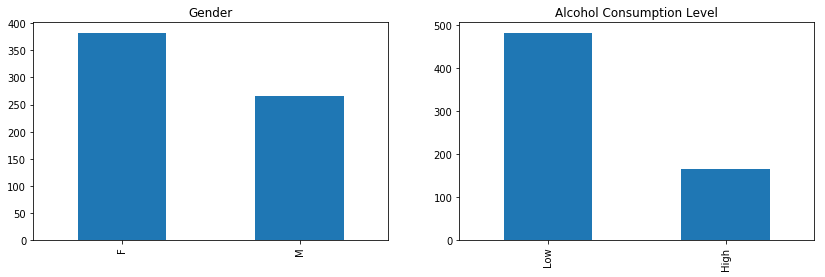

In [21]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['acl'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level');

In [22]:
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


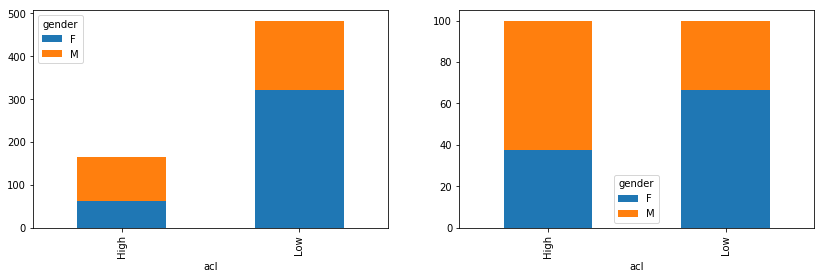

In [23]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0]);
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1]);

[Chi-square test of independence](https://onlinecourses.science.psu.edu/stat500/node/56) of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table.

In [24]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [25]:
p_value

8.7293301176943706e-11

In [26]:
expected_table = pd.DataFrame(expected, index=['High','Low'], columns=['F','M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


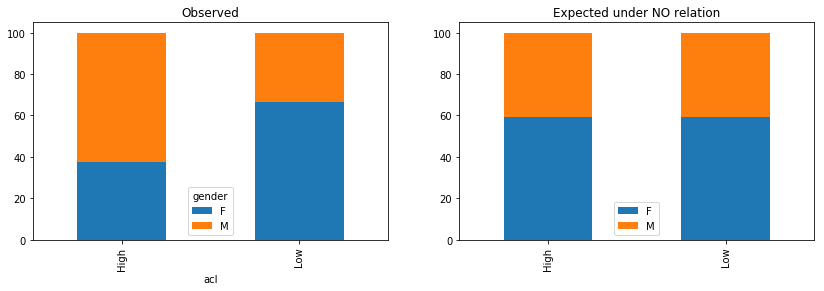

In [27]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Observed', ax=axes[0]);

(100*(expected_table.T/expected_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Expected under NO relation', ax=axes[1]);